In [6]:
import numpy as np
import matplotlib.pyplot as plt
from topfarm import TopFarmProblem
from topfarm.cost_models.cost_model_wrappers import CostModelComponent
from topfarm.easy_drivers import EasyScipyOptimizeDriver

def rozrahunok_topfarm(start_x, start_y, target_x, target_y):
    # Логіка (Формула вартості)
    def distance_cost(x, y):
        return np.sum((x - target_x)**2 + (y - target_y)**2)

    cost_comp = CostModelComponent(input_keys=['x', 'y'], n_wt=len(start_x), cost_function=distance_cost)
    
    problem = TopFarmProblem(
        design_vars={'x': start_x, 'y': start_y},
        cost_comp=cost_comp,
        driver=EasyScipyOptimizeDriver(maxiter=50)
    )

    cost, state, recorder = problem.optimize()
    
    # Графік
    plt.figure(figsize=(10, 6))
    plt.plot(start_x, start_y, 'o', color='gray', label='Старт', markersize=10, alpha=0.5)
    plt.plot(state['x'], state['y'], '^', color='red', label='Фініш', markersize=15)
    plt.plot(target_x, target_y, 'x', color='black', label='Ціль', markersize=10)
    for i in range(len(start_x)):
        plt.plot([start_x[i], state['x'][i]], [start_y[i], state['y'][i]], '--', color='gray', alpha=0.3)
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

In [8]:
import os
import subprocess
import sys
import json

def run_command(command):
    """Запускає команду в терміналі і виводить результат."""
    try:
        subprocess.check_call(command, shell=True)
    except subprocess.CalledProcessError as e:
        print(f"❌ Помилка при виконанні: {command}")
        sys.exit(1)

def create_file(path, content):
    """Створює файл з заданим вмістом."""
    with open(path, 'w', encoding='utf-8') as f:
        f.write(content)
    print(f"✅ Створено файл: {path}")

def main():
    print("🚀 Починаємо автоматичне налаштування (Кроки 4-8)...")

    # --- КРОК 4: Структура проекту ---
    print("\n--- КРОК 4: Створення структури ---")
    os.makedirs("notebooks", exist_ok=True)
    
    requirements_content = """topfarm
numpy
pandas
matplotlib
jupyter
ipykernel
"""
    create_file("requirements.txt", requirements_content)
    
    # Перевірка наявності README (створимо, якщо немає, щоб Git не сварився)
    if not os.path.exists("README.md"):
        create_file("README.md", "# TopFarm Project\nAutomated setup.")

    # --- КРОК 5: Інсталяція залежностей ---
    print("\n--- КРОК 5: Інсталяція бібліотек ---")
    run_command(f"{sys.executable} --version")
    run_command(f"{sys.executable} -m pip install --upgrade pip")
    run_command(f"{sys.executable} -m pip install -r requirements.txt")

    print("🔍 Перевірка імпортів...")
    run_command(f'{sys.executable} -c "import numpy, pandas, matplotlib; print(\'✅ Base imports OK\')"')
    run_command(f'{sys.executable} -c "import topfarm; print(\'✅ Topfarm OK\')"')

    # --- КРОК 6 & 7: Створення Notebook (JSON формат) ---
    print("\n--- КРОК 6 & 7: Генерація Notebook ---")
    
    # Код для першої комірки (з завдання)
    code_cell_1 = [
        "import numpy as np\n",
        "import matplotlib.pyplot as plt\n",
        "import topfarm\n\n",
        "x = np.array([0, 500, 1000, 1500])\n",
        "y = np.array([0, 0, 500, 500])\n\n",
        "plt.figure(figsize=(6, 4))\n",
        "plt.scatter(x, y)\n",
        "plt.title(\"Layout turbin – Zadanie 2.1\")\n",
        "plt.xlabel(\"x [m]\")\n",
        "plt.ylabel(\"y [m]\")\n",
        "plt.grid(True)\n",
        "plt.axis(\"equal\")\n",
        "plt.show()"
    ]

    # Код для другої комірки (Результат роботи Copilot з Кроку 7)
    code_cell_2 = [
        "# Code generated based on Prompt 2 (Copilot Simulation)\n",
        "colors = ['blue', 'red', 'green', 'yellow']\n",
        "labels = ['T1', 'T2', 'T3', 'T4']\n\n",
        "plt.figure(figsize=(8, 6))\n",
        "# Loop to plot each point with a different color and label\n",
        "for i in range(len(x)):\n",
        "    plt.scatter(x[i], y[i], c=colors[i], label=labels[i], s=100, zorder=2)\n",
        "    plt.text(x[i]+50, y[i]+50, labels[i], fontsize=12)\n\n",
        "plt.title(\"Layout turbin – Zadanie 2.1 z kolorami i etykietami\")\n",
        "plt.xlabel(\"x [m]\")\n",
        "plt.ylabel(\"y [m]\")\n",
        "plt.grid(True, linestyle='--', alpha=0.7)\n",
        "plt.axis(\"equal\")\n",
        "plt.legend()\n",
        "plt.show()"
    ]

    notebook_content = {
        "cells": [
            {
                "cell_type": "code",
                "execution_count": None,
                "metadata": {},
                "outputs": [],
                "source": code_cell_1
            },
            {
                "cell_type": "markdown",
                "metadata": {},
                "source": ["### Результат Кроку 7 (Copilot Prompt 2)\n", "Цей код був доданий автоматично замість ручного копіювання з чату."]
            },
            {
                "cell_type": "code",
                "execution_count": None,
                "metadata": {},
                "outputs": [],
                "source": code_cell_2
            }
        ],
        "metadata": {
            "kernelspec": {
                "display_name": "Python 3",
                "language": "python",
                "name": "python3"
            },
            "language_info": {
                "codemirror_mode": {
                    "name": "ipython",
                    "version": 3
                },
                "file_extension": ".py",
                "mimetype": "text/x-python",
                "name": "python",
                "nbconvert_exporter": "python",
                "pygments_lexer": "ipython3",
                "version": "3.8.5"
            }
        },
        "nbformat": 4,
        "nbformat_minor": 4
    }

    nb_path = os.path.join("notebooks", "lesson1_hello_topfarm2.ipynb")
    with open(nb_path, 'w', encoding='utf-8') as f:
        json.dump(notebook_content, f, indent=2)
    print(f"✅ Notebook створено: {nb_path}")

    # --- КРОК 8: Git Commit & Push ---
    print("\n--- КРОК 8: Git Commit & Push ---")
    try:
        # Налаштування email/name якщо ще не налаштовано (для Codespaces)
        subprocess.run("git config --global user.email 'student@example.com'", shell=True)
        subprocess.run("git config --global user.name 'Student'", shell=True)
        
        run_command("git add .")
        run_command('git commit -m "Zadanie 2.1: uruchomiony notebook + raport w notebooku"')
        print("✅ Зміни зафіксовано (Committed).")
        print("ℹ️  Для відправки на сервер (Push) введіть команду: git push")
    except Exception as e:
        print(f"⚠️ Помилка Git (можливо репо ще не ініціалізовано): {e}")

    print("\n🎉 ВСЕ ГОТОВО! Відкрийте файл notebooks/lesson1_hello_topfarm2.ipynb і натисніть 'Run All'.")

if __name__ == "__main__":
    main()

🚀 Починаємо автоматичне налаштування (Кроки 4-8)...

--- КРОК 4: Створення структури ---
✅ Створено файл: requirements.txt

--- КРОК 5: Інсталяція бібліотек ---
Python 3.12.1
🔍 Перевірка імпортів...
✅ Base imports OK
✅ Topfarm OK

--- КРОК 6 & 7: Генерація Notebook ---
✅ Notebook створено: notebooks/lesson1_hello_topfarm2.ipynb

--- КРОК 8: Git Commit & Push ---
[main 6c021ba] Zadanie 2.1: uruchomiony notebook + raport w notebooku
 3 files changed, 486 insertions(+), 11 deletions(-)
 create mode 100644 notebooks/lesson1_hello_topfarm2.ipynb
 create mode 100644 requirements.txt
✅ Зміни зафіксовано (Committed).
ℹ️  Для відправки на сервер (Push) введіть команду: git push

🎉 ВСЕ ГОТОВО! Відкрийте файл notebooks/lesson1_hello_topfarm2.ipynb і натисніть 'Run All'.


Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.0194839173657902e-28
            Iterations: 2
            Function evaluations: 3
            Gradient evaluations: 2
Optimization Complete
-----------------------------------


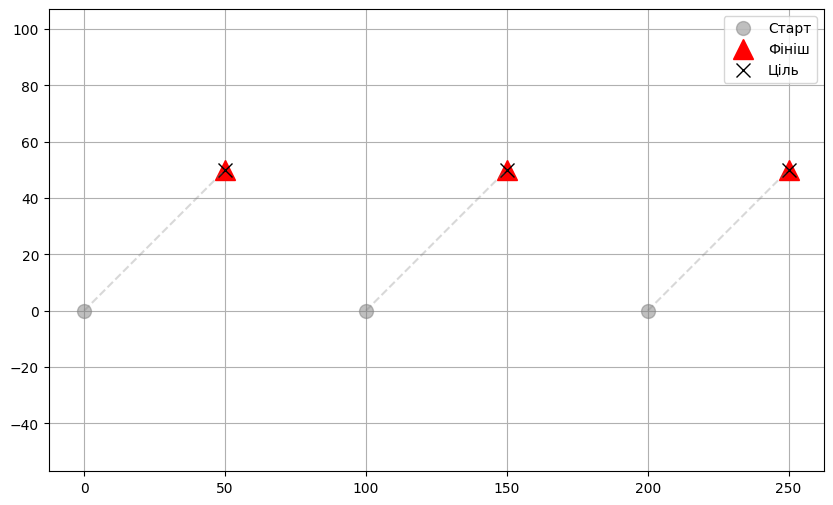

In [7]:

moi_x = [0,  100, 200]
moi_y = [0,  0,   0]

ideal_x = [50, 150, 250]
ideal_y = [50, 50,  50]


rozrahunok_topfarm(moi_x, moi_y, ideal_x, ideal_y)